In [7]:
import os
import shutil
import re
import matplotlib.pyplot as plt
import csv

In [ ]:
directory='/Bigraph_for_Port/Port_Model_small/analysis/'

In [ ]:
with open('/Bigraph_for_Port/Port_Model_small/scripts/queries.txt', 'r') as f:
    lines = f.readlines()
f.close()
formula={}
i=1
j=1
for line in lines:
    if ';' not in line:
        formula[str(j)]=line.strip()
        j+=1
# print(formula)
np=j
# print(np)

In [10]:
label_colors = {
    'CCC': {'color':'#1f3a63','linestyle': 'solid'},
    'CCT': {'color': '#2a4d2f','linestyle': 'solid'},
    'CTT': {'color':'#9e2a2b','linestyle': 'solid'},
    'TTT': {'color':'#4b0082','linestyle': 'solid'},
    'Any 2': {'color':'#006666','linestyle': 'dashed'},
    'Any 3': {'color':'#556b2f','linestyle': 'dotted'}
}

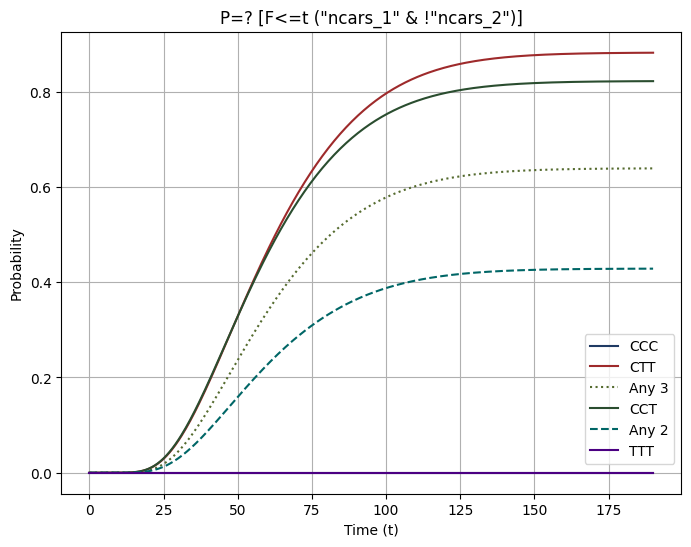

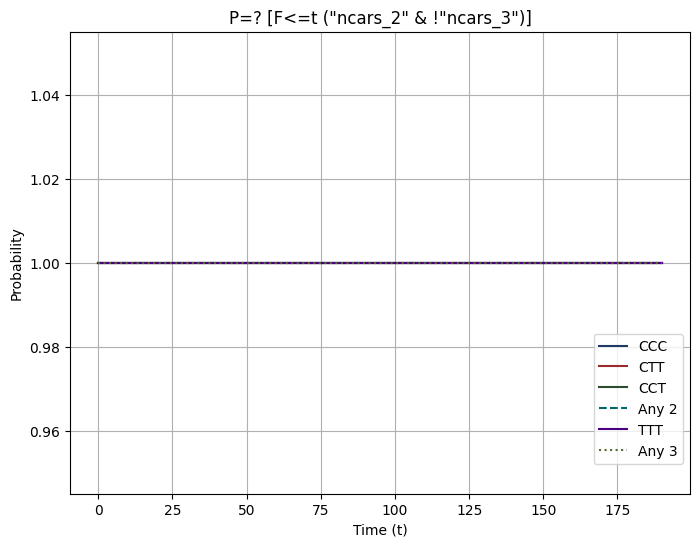

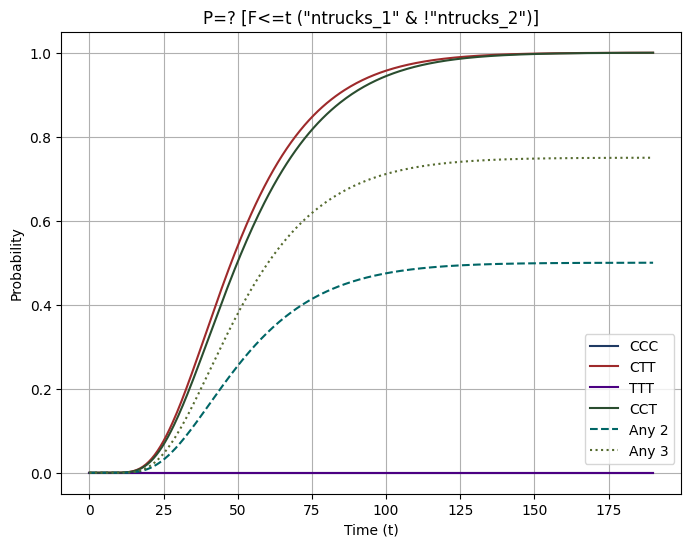

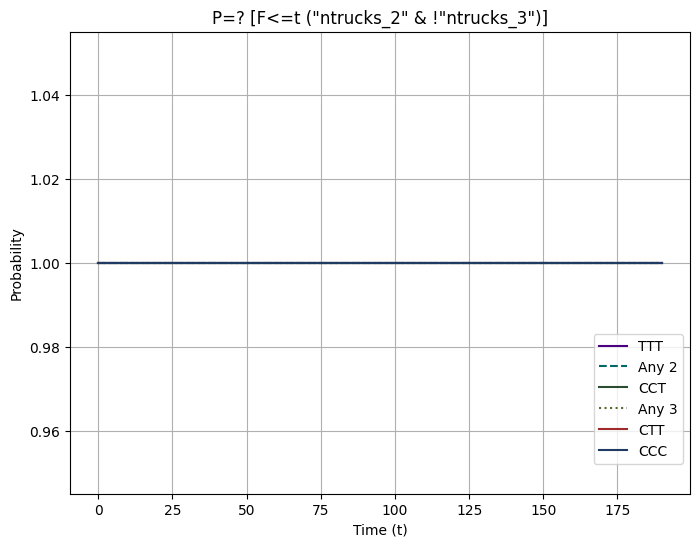

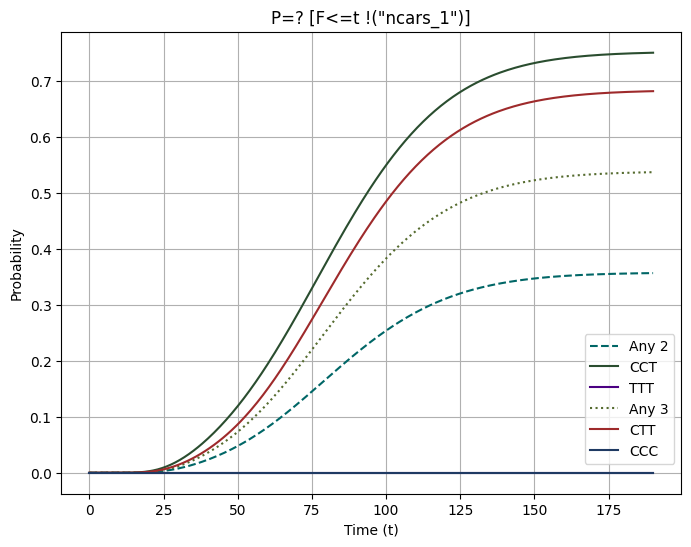

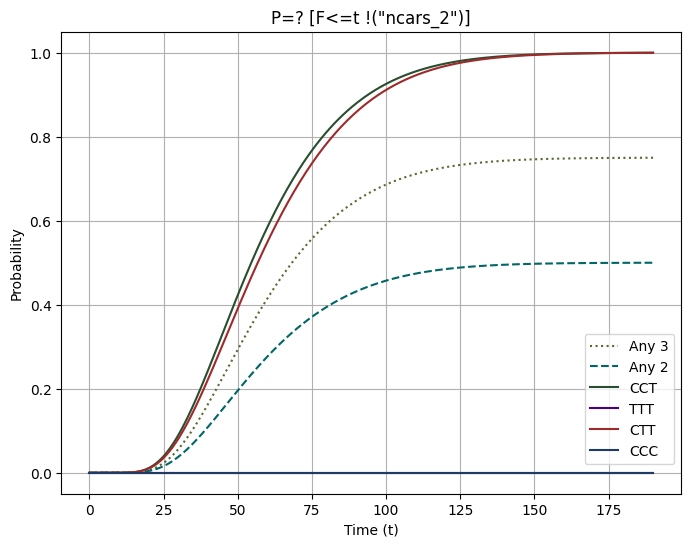

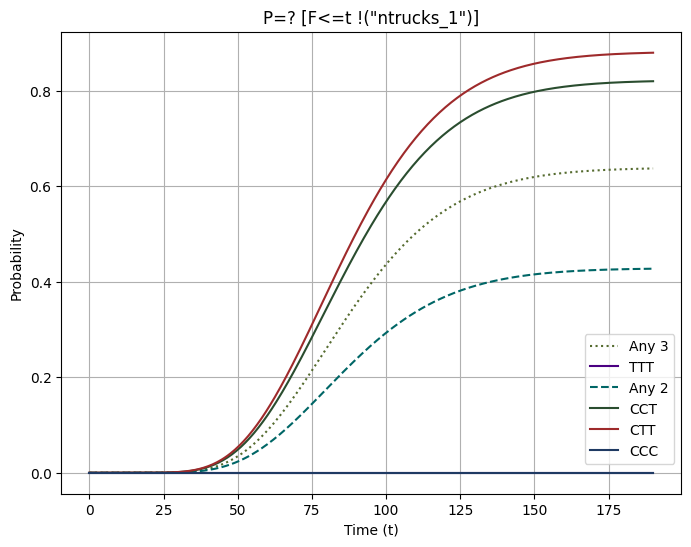

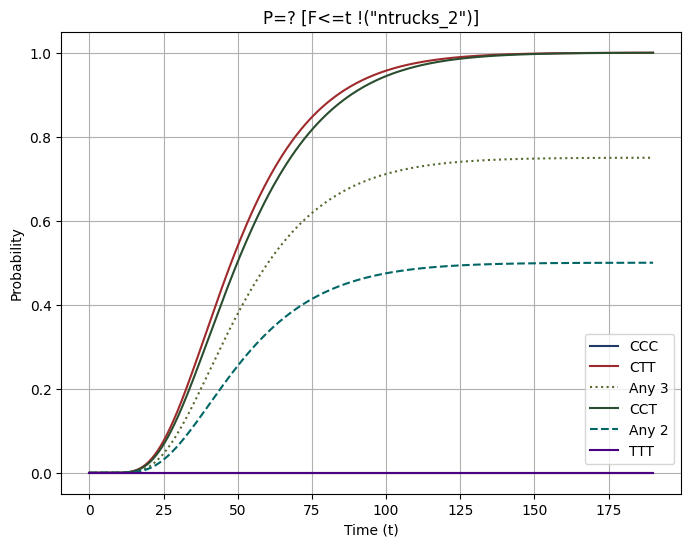

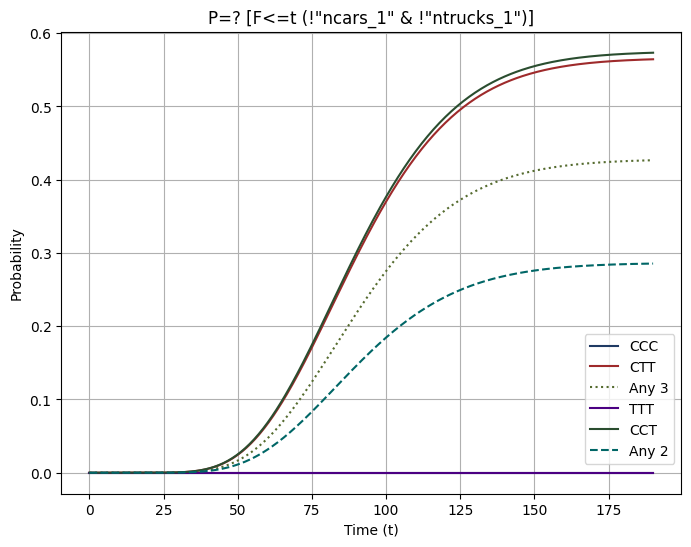

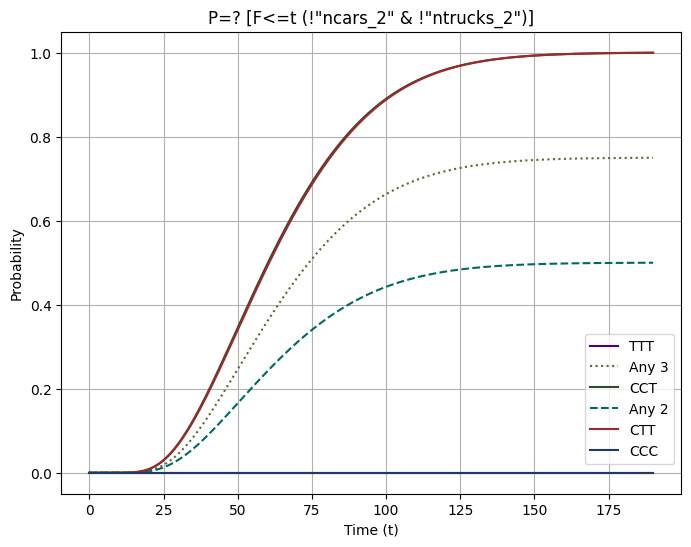

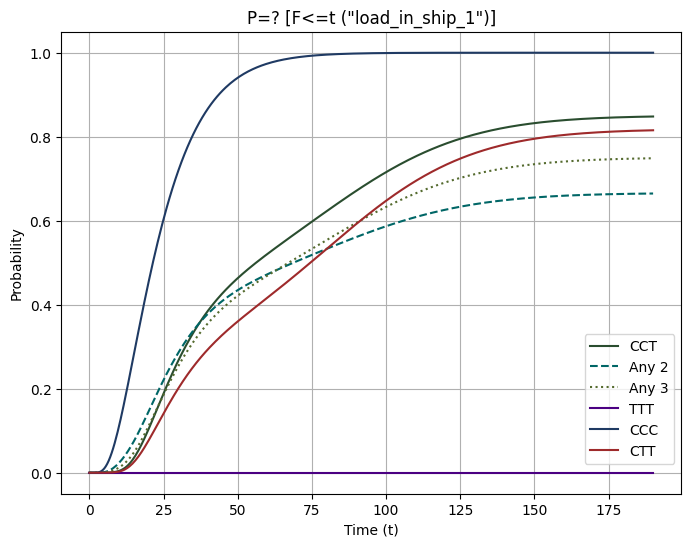

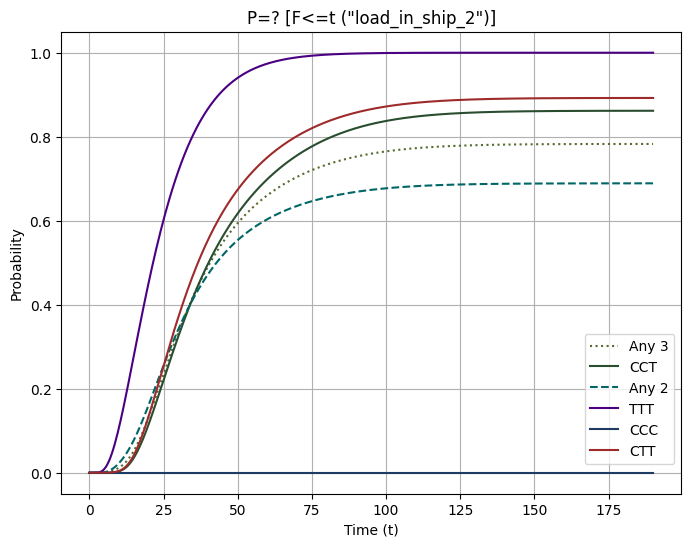

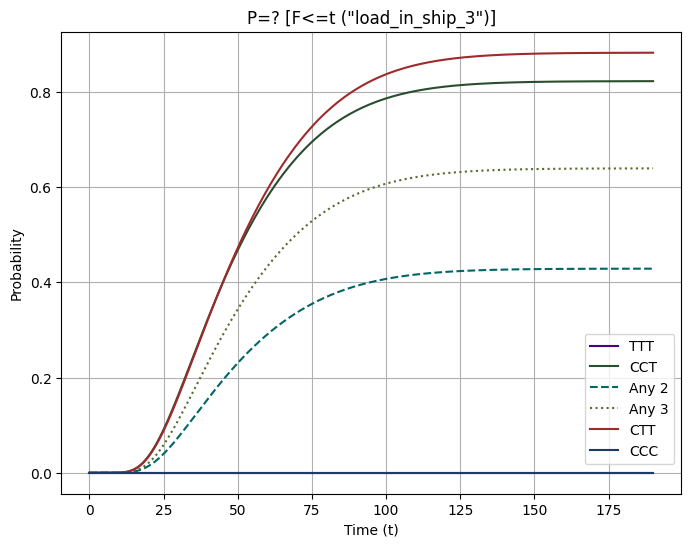

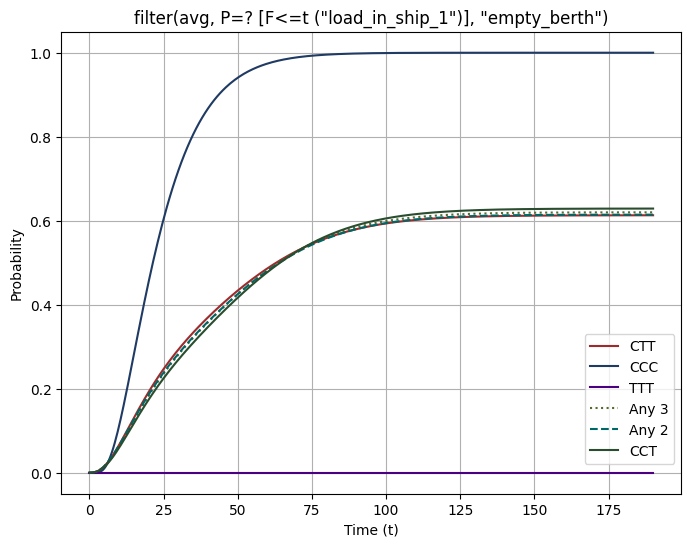

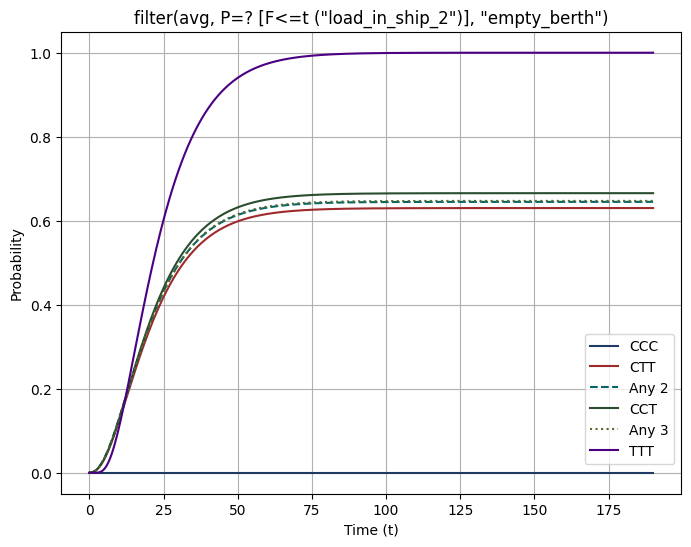

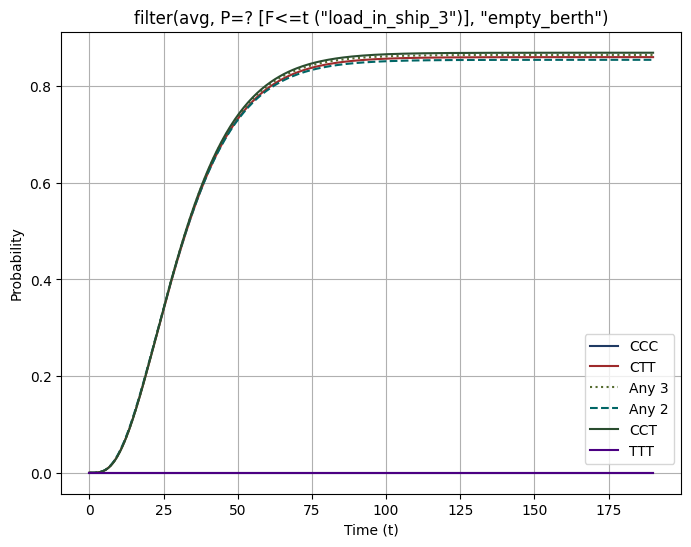

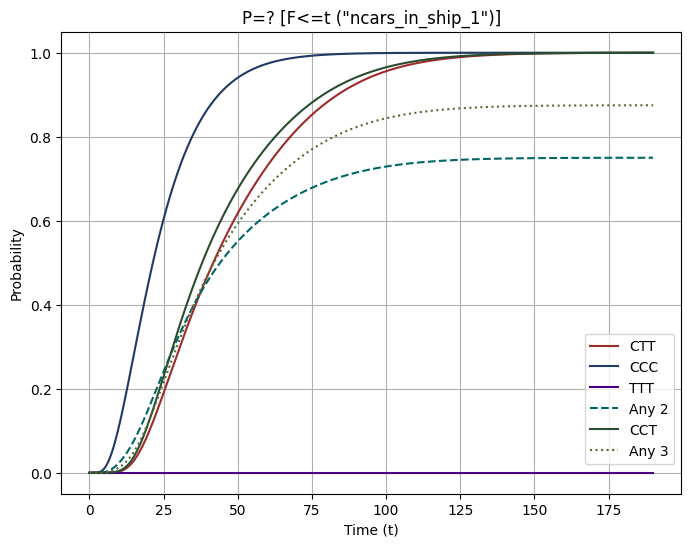

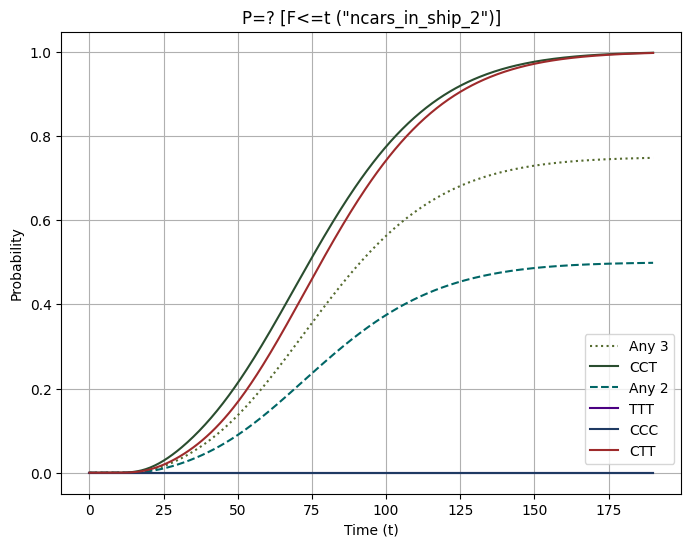

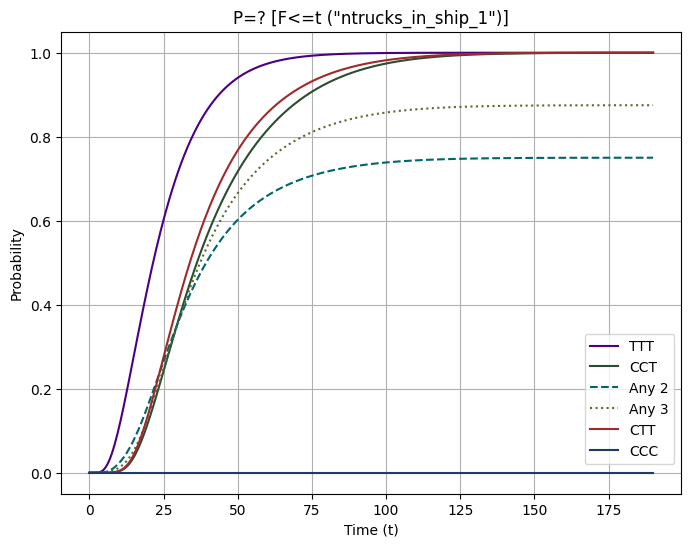

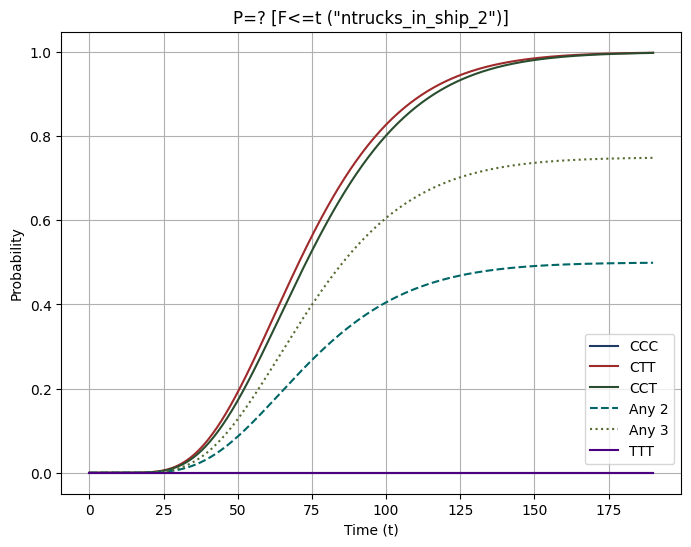

In [11]:
for i in range(1,np+1):
    X=[]
    Y=[]
    labels=[]
    for filename in os.listdir(directory):
        if filename.endswith('_csv.txt'):
            ctr=0
            a=filename.split('.')[0].split('_')
            if int(a[-2])==i:
                x = []  
                y = [] 
                with open(directory+filename, 'r') as file:
                    reader = csv.reader(file)
                    next(reader) 
                    for row in reader:
                        if ctr>380:
                            break
                        else:
                            ctr+=1
                            x.append(float(row[0]))  
                            y.append(float(row[1]))
                    Y.append(y)
                    labels.append(a[-3])
                X.append(x)
    if len(labels)>0:
        # labels=sorted(labels)
        labels[labels.index('generic')]='Any 2'
        labels[labels.index('generic3')]='Any 3'
    if len(X)>0 and len(Y)>0:
        plt.figure(figsize=(8, 6))
        for y,labels in zip(Y,labels):
            a=label_colors[labels]
            plt.plot(x, y, label=labels, color=a['color'], linestyle=a['linestyle'])
        plt.xlabel('Time (t)')
        plt.ylabel('Probability')
        plt.grid(True)
        plt.title(formula[str(i)])
        plt.legend(loc='lower right', bbox_to_anchor=(1, 0.05))
        plt.savefig(directory+'/Plots/'+formula[str(i)]+'.png', dpi=300)  
        plt.show()